In [2]:
# 두 행간의 차를 구해주는 함수

### Sisfall의 데이터 파일 불러오기
import csv

f = open('../Dataset/SA01/D01_SA01_R01.csv', 'r')
rdr = csv.reader(f)
file = []
for line in rdr:
    if ';' in line[-1]:
        line[-1] =  line[-1].replace(';','')
    file.append(line)
f.close()

### 두 행의 차를 담고 있는 csv 파일 만들기
f = open('cha.csv', 'w', encoding='utf-8')
wr = csv.writer(f)

cha_all = []

for i in range(len(file)-1):
    cha = []
    for j in range(len(file[i])):
        if ';' in file[i][-1]:
            file[i][-1] = file[i][-1].replace(';', '')
        new = int(file[i][j]) - int(file[i+1][j])
        cha.append(new)
    cha_all.append(cha)

wr.writerows(cha_all)
f.close()


In [23]:
import csv

f = open('./cha.csv', 'r')
rdr = csv.reader(f)
file = []

for line in rdr:
    file.append(line)
f.close()

print(len(file))

19998


In [24]:
# 슬라이딩 윈도우 개수를 알아야 인덱싱도 하고 그럴거 같은데..

def sliding_window_number(total_length, window_length, coverage_percent):
    numerator = total_length - (window_length * coverage_percent)
    denominator = window_length * (1 - coverage_percent)
    total_sliding_window_number = numerator / denominator

    return total_sliding_window_number

print(sliding_window_number(19998, 50, 0.5))

798.92


In [25]:
data

,0,1,2,3,4,5,6,7,8
0,2,-5,-9,35,64,-46,28,-22,-25
1,14,2,-9,31,45,-35,50,-7,-33
2,11,4,-4,20,34,-44,32,29,-46
3,11,11,-14,24,28,-36,40,44,-42
4,16,34,-4,18,25,-32,36,99,-30
...,...,...,...,...,...,...,...,...,...
19993,7,1,-4,53,72,-31,32,-2,-32
19994,12,-4,-13,63,55,-38,26,-2,-59
19995,3,12,-12,44,33,-34,35,40,-40
19996,3,22,-8,35,17,-37,14,98,-22


In [26]:
# 차 리스트의 값들을 제곱해서 더해서 절대적인 변화량을 측정하기
# 아 이게 아니고 각 축마다, 각 센서마다,전체 값마다의 영역으로 나눠야겠네...
# 왜냐하면 여러개의 리스트를 슬라이딩 윈도우의 하나의 리스트로 변환해야하니까!
# 넘파이로 세로 연산하면 편하기는 할텐데, 나중에 변환해야하면 어쩌
# 근데 방금 든 생각인데 Y축 변화량만 따로 보면 어떨까? 

import math

def rms(num_array):
    for num in num_list:

        total += num ** 2
        total = math.sqrt(total)

    return total

rms([1, 2, 3, 4, 5])


NameError: name 'num_list' is not defined

In [47]:
import pandas as pd
import numpy as np

# 이제 이 차를 가지고 sliding 윈도우 내용을 계산해볼까...?
data = pd.read_csv("./cha.csv", header=None)
col = (data.shape)[0]

length = 50
repeat = 0.5


total_count = sliding_window_number(col, length, repeat)
print(total_count)
print(col-length)
print(int(length*repeat))

sliding_window_sum = []

for new_row in data:
    for  i in range(0, col-length, int(length*repeat)):
        index_start, index_end = [i, i+length]
        if index_end < col-length:
            # print(index_start, index_end)
            sliding_window = data.iloc[index_start:index_end, :]
            sliding_window_sum.append(sliding_window.sum(axis=0))
            #print(list(new_data))
            #print(data.iloc[index_start:index_end, :])
        else:
            pass
            #print(data.iloc[index_start:, :])
            # print(index_end, col-length)


sliding_window_test = pd.DataFrame(sliding_window_sum)
sliding_window_test
#print(len(sliding_window_sum))

# f = open('sliding_test.csv', 'w', encoding='utf-8')
# wr = csv.writer(f)

# wr.writerows()
# f.close()

798.92
19948
25


,0,1,2,3,4,5,6,7,8
0,20,54,-95,145,-929,-707,88,204,-394
1,92,-13,-57,210,-954,325,348,-39,-193
2,47,104,-27,-126,372,-24,172,434,-115
3,-7,-1,140,-8,146,-270,-1,-11,543
4,3,-106,69,105,-227,817,19,-435,287
...,...,...,...,...,...,...,...,...,...
7159,62,17,-54,-66,-538,499,238,47,-217
7160,45,135,39,365,397,-31,165,533,177
7161,-11,1,76,395,-65,-405,-71,-6,299
7162,-1,-140,-6,-536,298,879,-15,-562,-27


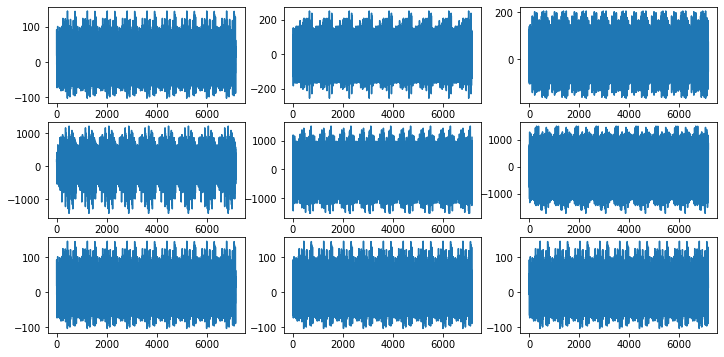

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(3, 3, 1)
plt.plot(sliding_window_test[0])
plt.subplot(3, 3, 2)
plt.plot(sliding_window_test[1])
plt.subplot(3, 3, 3)
plt.plot(sliding_window_test[2])

plt.subplot(3, 3, 4)
plt.plot(sliding_window_test[3])
plt.subplot(3, 3, 5)
plt.plot(sliding_window_test[4])
plt.subplot(3, 3, 6)
plt.plot(sliding_window_test[5])

plt.subplot(3, 3, 7)
plt.plot(sliding_window_test[0])
plt.subplot(3, 3, 8)
plt.plot(sliding_window_test[0])
plt.subplot(3, 3, 9)
plt.plot(sliding_window_test[0])


In [43]:
pip install matplotlib

  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached Pillow-8.4.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached pyparsing-3.0.4-py3-none-any.whl (96 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [91]:
# 그 값을 k-means로 넣어서 계산 ㄱㄱ
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#train, test split - random화 해야지..까먹음... ㅠ
shuffle_map = np.arange(data.shape[0])
np.random.shuffle(shuffle_map)
shuffle_map

data = sliding_window_test[:]
target = sliding_window_test[]
train = sliding_window_test[:index][:]
test = sliding_window_test[index:][:]

mc  = MinMaxScaler()
train = mc.fit_transform(train)
test = mc.fit_transform(test)

km = KMeans(n_clusters = 4, random_state=42)
km.fit(train)

print(np.unique(km.labels_, return_counts=True))

SyntaxError: invalid syntax (3617634228.py, line 10)

In [99]:
shuffle_map = np.arange(data.shape[0])
shuffle_map
np.random.shuffle(shuffle_map)
shuffle_map[0]

5066

In [100]:
pip list

Package           Version
----------------- -------
backcall          0.2.0  
cycler            0.11.0 
debugpy           1.5.1  
decorator         5.1.0  
entrypoints       0.3    
ipykernel         6.5.0  
ipython           7.29.0 
jedi              0.18.0 
joblib            1.1.0  
jupyter-client    7.0.6  
jupyter-core      4.9.1  
kiwisolver        1.3.2  
matplotlib        3.4.3  
matplotlib-inline 0.1.3  
nest-asyncio      1.5.1  
numpy             1.21.4 
pandas            1.3.4  
parso             0.8.2  
pexpect           4.8.0  
pickleshare       0.7.5  
Pillow            8.4.0  
pip               20.0.2 
pkg-resources     0.0.0  
prompt-toolkit    3.0.22 
ptyprocess        0.7.0  
Pygments          2.10.0 
pyparsing         3.0.4  
python-dateutil   2.8.2  
pytz              2021.3 
pyzmq             22.3.0 
scikit-learn      1.0.1  
scipy             1.7.2  
setuptools        44.0.0 
six               1.16.0 
sklearn           0.0    
threadpoolctl     3.0.0  
tornado     